In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

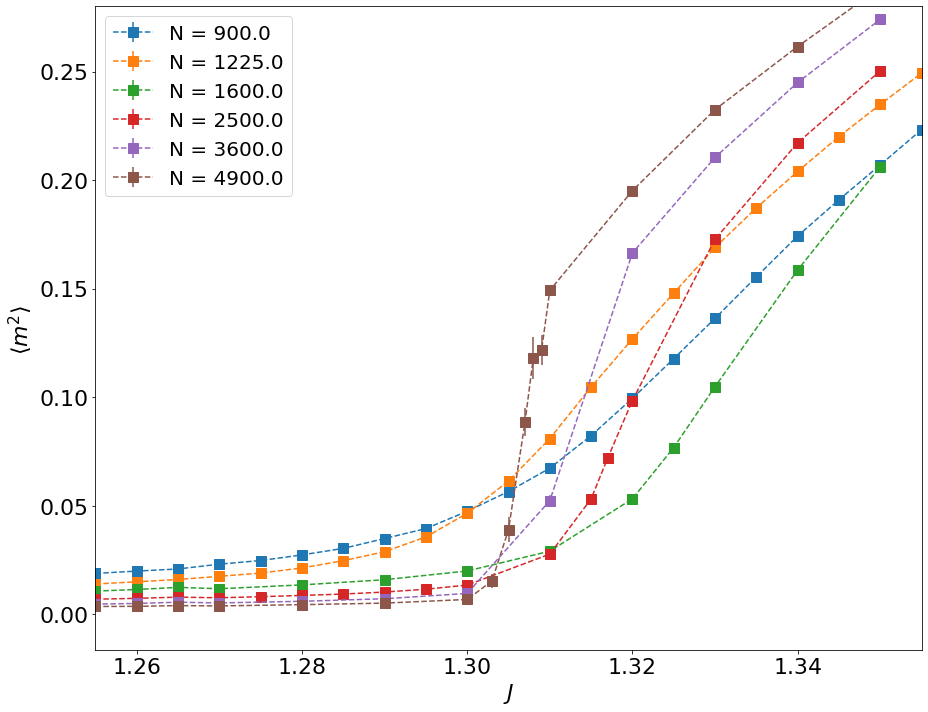

In [2]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))
  
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    
    if l<900: continue
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    # 
    errs = data_l[:,18]
   

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(top=0.28)
plt.xlim(left = 1.255, right=1.355)
#plt.axes().set_xlim(right=1.325)
#plt.grid()
#ax.set_lim()
plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/magnetization2_longchains.png", bbox_inches='tight')

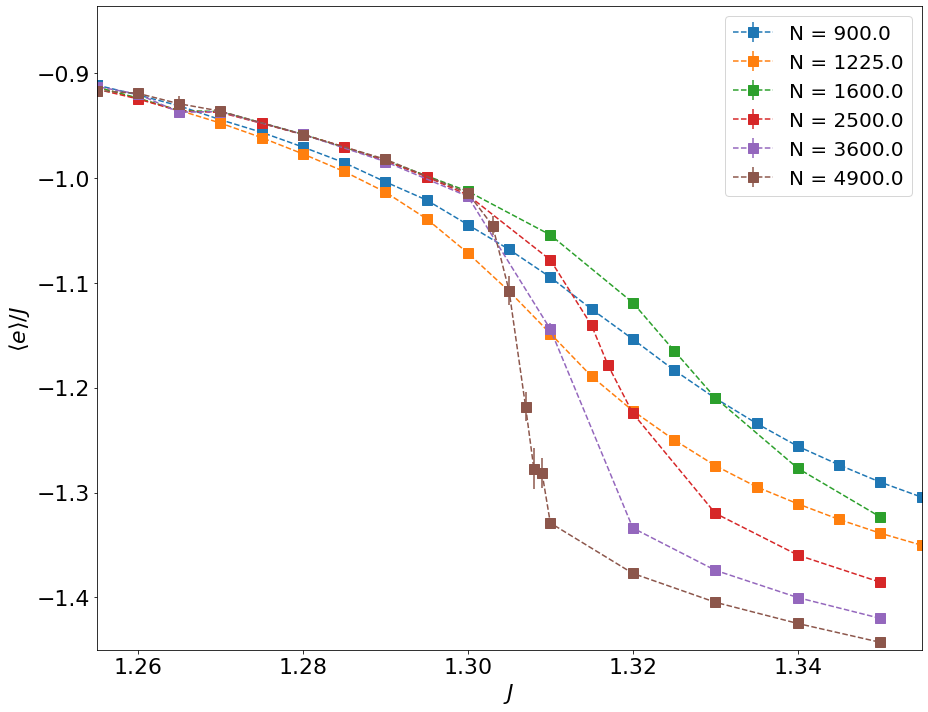

In [3]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l<900: continue
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)
plt.ylim(-1.45)
plt.xlim(left = 1.255, right=1.355)
#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/energy_longchains.png", bbox_inches='tight')

<ipython-input-29-2bec3b438d65>:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


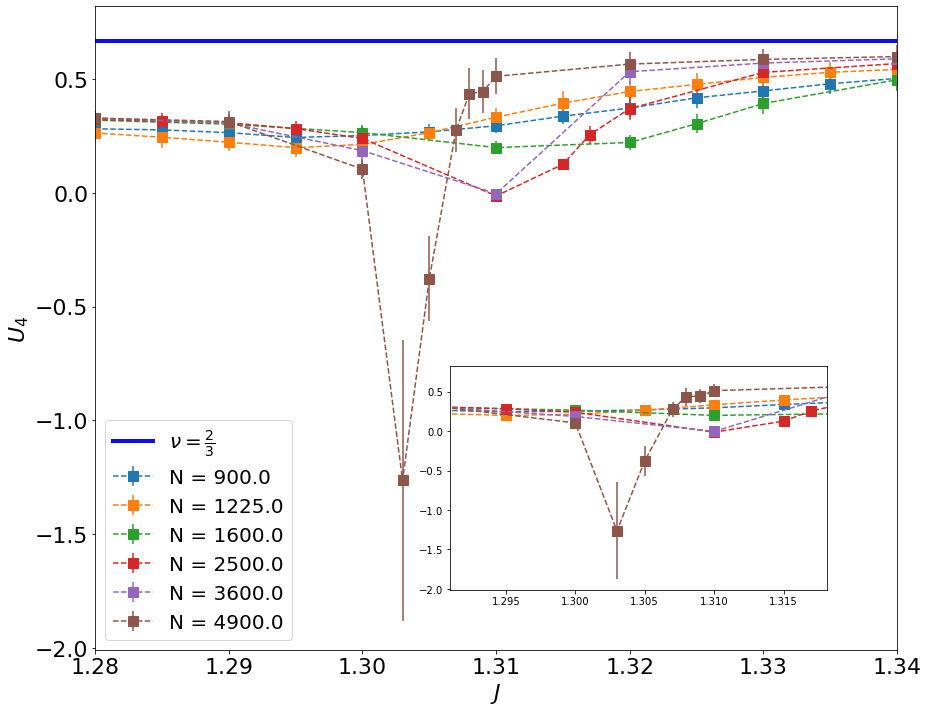

In [29]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

l, b, h, w = .485, .175, .31, .402
ax2 = fig.add_axes([l, b, w, h])
#ax2.plot([1, 4, 6, 2, 1, 5, 2], color='green', lw=3, label="inside plot")


for l in lengths:
    if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]     
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc
    ax.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
    
    #data_l=data_l[ind] 
    #data_l = data_l[data_l[:,1]>1.291]
    #data_l = data_l[data_l[:,1]<1.3181]
    J_l = data_l[:, 1]
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=np.sqrt(errs)*bc    
    
    ax2.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
ax.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
ax.set_xlabel(r'$J$', fontsize = 22)
ax.set_ylabel(r"$ U_4 $ ", fontsize=22)
ax.tick_params(axis='x', labelsize=22) 
ax.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
#plt.xlim(left = 1.255, right=1.355)

ax.set_xlim(left = 1.28, right=1.34)
ax2.set_xlim(1.291,1.3181)


fig.tight_layout()


ax.legend(loc="best", fontsize=20)
 
 
#ax.tight_layout()

plt.savefig("Thesis/Images/bindercumulants_longchains.png", bbox_inches='tight')

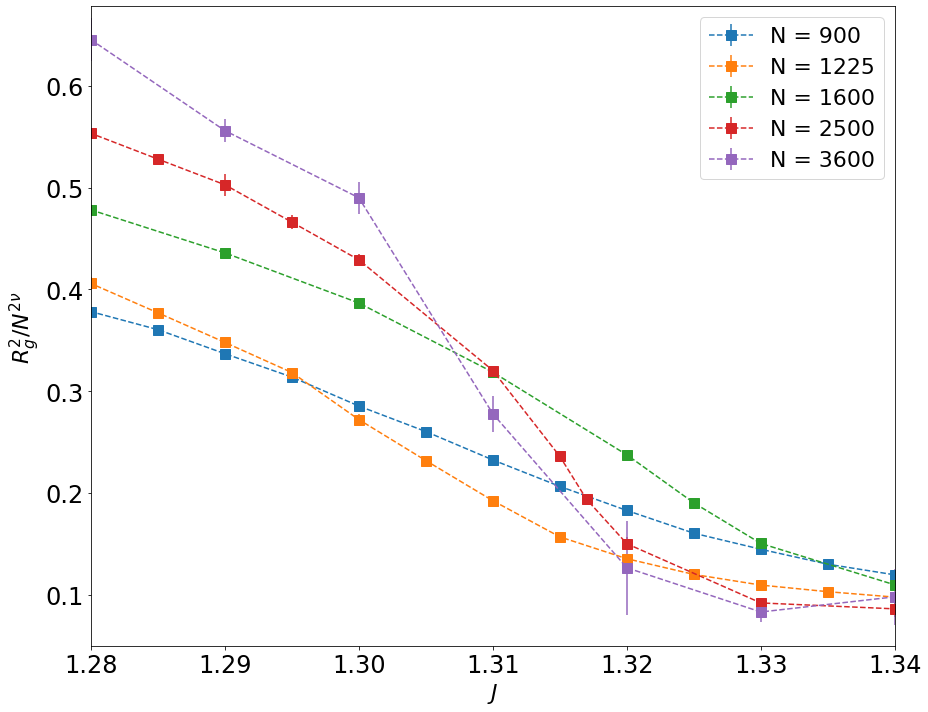

In [5]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if l<900: continue
    if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 5]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 6]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R_g^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
 
plt.ylim(0.05, 0.67795)
 
plt.xlim(left = 1.28, right=1.34)
plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchains.png", bbox_inches='tight')

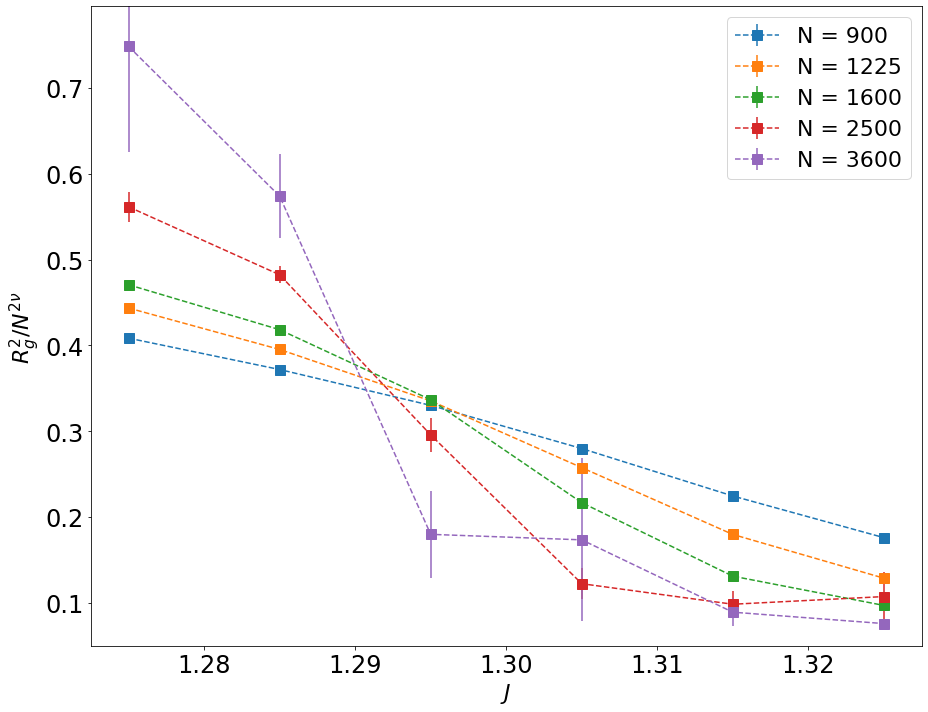

In [8]:
data_np = np.loadtxt("CPP/RadiusPlot/LongChains.txt", skiprows=0)
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if l<900: continue
    if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 5]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 6]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R_g^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
plt.ylim(0.05, 0.795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
#plt.savefig("Thesis/Images/rscaling_longchains.png", bbox_inches='tight')

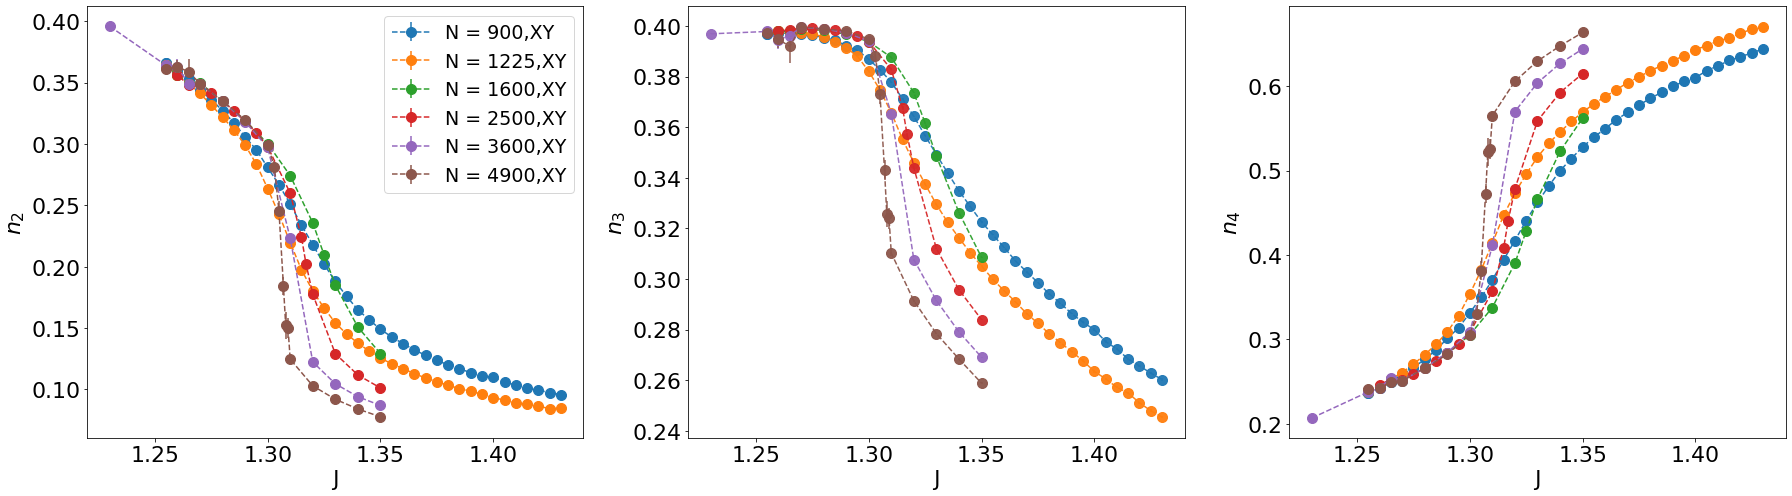

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(25,7)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
    if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
  
#axes[1].axvline(0.667, c ="k") 
#axes[0].axvline(0.667, c ="k") 
#axes[2].axvline(0.667, c ="k") 


#axes[1].axvline(0.832, c ="brown", ls = "--") 
#axes[0].axvline(0.832, c ="brown", ls = "--") 
#axes[2].axvline(0.832, c ="brown", ls = "--") 
 
    
#axes[0].set_title(r'$n_2$', fontsize=22)    
#axes[1].set_title(r'$n_3$', fontsize=22)    
#axes[2].set_title(r'$n_4$', fontsize=22)    
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(3):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
 
    
    
plt.tight_layout()

plt.savefig("Thesis/Images/bulk_longchains.png", bbox_inches='tight')

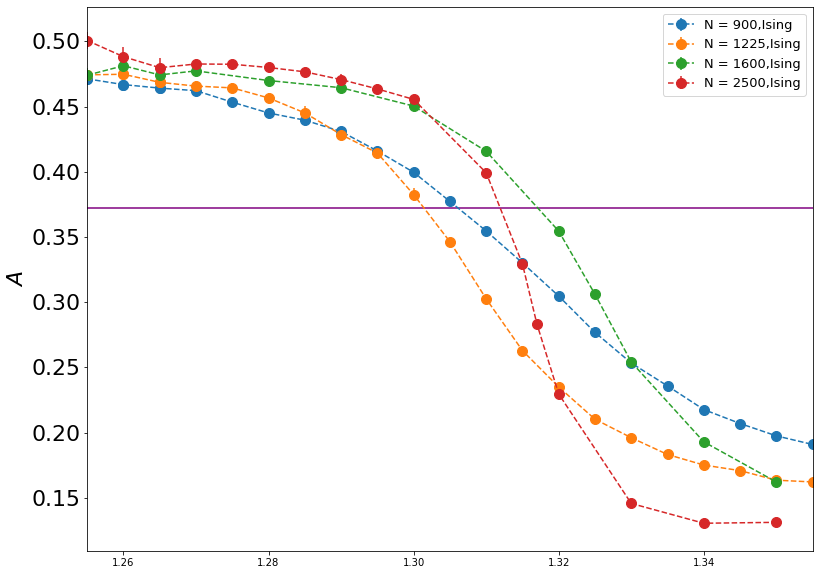

In [7]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:
    if l<900: continue
        
    if (l==4900 or l==3600 or l==25000): continue

    #if (l>3600): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    plt.errorbar(J_l, data_l[:,32], yerr=data_l[:,33], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
   
 
 
plt.axhline(0.3726, c ="purple") 
#plt.axvline(1.35, c ="brown", ls = "--", alpha =0.7) 
    
ax.set_ylabel(r'$A$', fontsize=22)    
plt.xlim(left = 1.255, right=1.355)


plt.legend(fontsize = 13)

plt.tick_params(axis='y', labelsize=22) 

plt.savefig("Thesis/Images/aspherical_longchains.png", bbox_inches='tight')

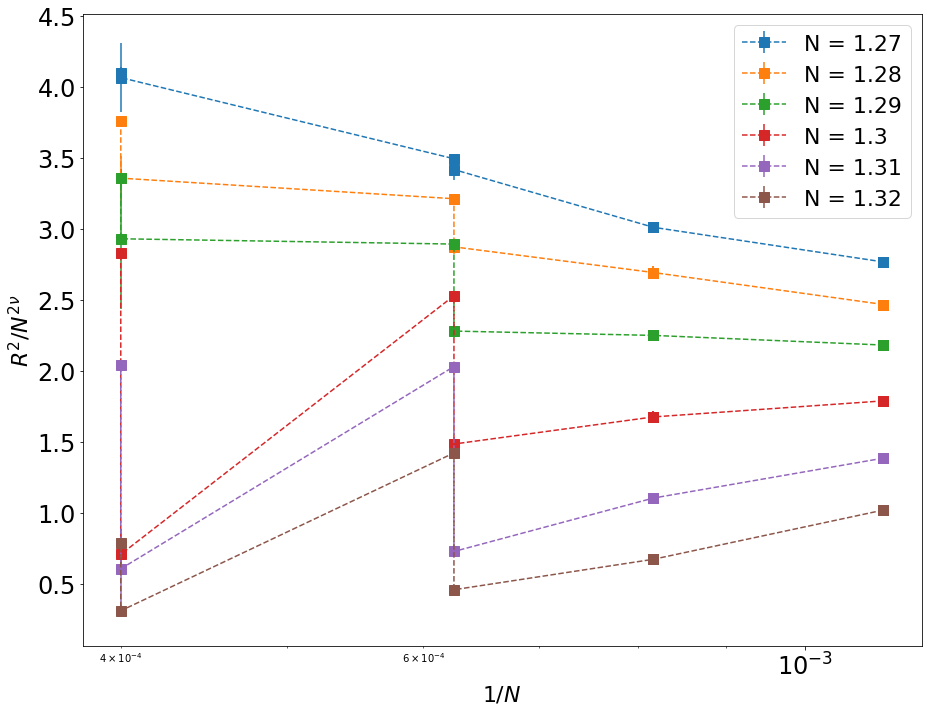

In [4]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]>1.25] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))


y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]
lengths = np.unique(data_np[:, 1])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

data_np = data_np[data_np[:,0]<3600]
data_np = data_np[data_np[:,0]>800]
#lengths
lengths = [1.27, 1.28, 1.29, 1.3, 1.31, 1.32]
for l in lengths:
    #if l<900: continue
    #if (l==4900 or l==36000 or l==25000): continue
    data_l = data_np[data_np[:,1]==l]
    
    ind = np.argsort(data_l[:,0])
    data_l=data_l[ind]
    J_l = data_l[:, 0]
    #print(J_l)
    r_l = data_l[:, 3]
    
    bc = r_l/np.power( data_l[:, 0], 2*nu)
 
    errs = data_l[:, 4]/np.power( data_l[:, 0], 2*nu)

    plt.errorbar(1/J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str((l)))
 
 
plt.xlabel(r'$1/N $', fontsize = 22)
plt.ylabel(r"$ R ^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(1.26, 1.45)
#plt.ylim(0.05, 0.60795)
 
#plt.xlim(left = 1.255, right=1.355)
plt.legend(fontsize=22)

plt.xscale("log")
#plt.grid()
plt.tight_layout()
#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")
plt.savefig("Thesis/Images/rscaling_longchainscross.png", bbox_inches='tight')

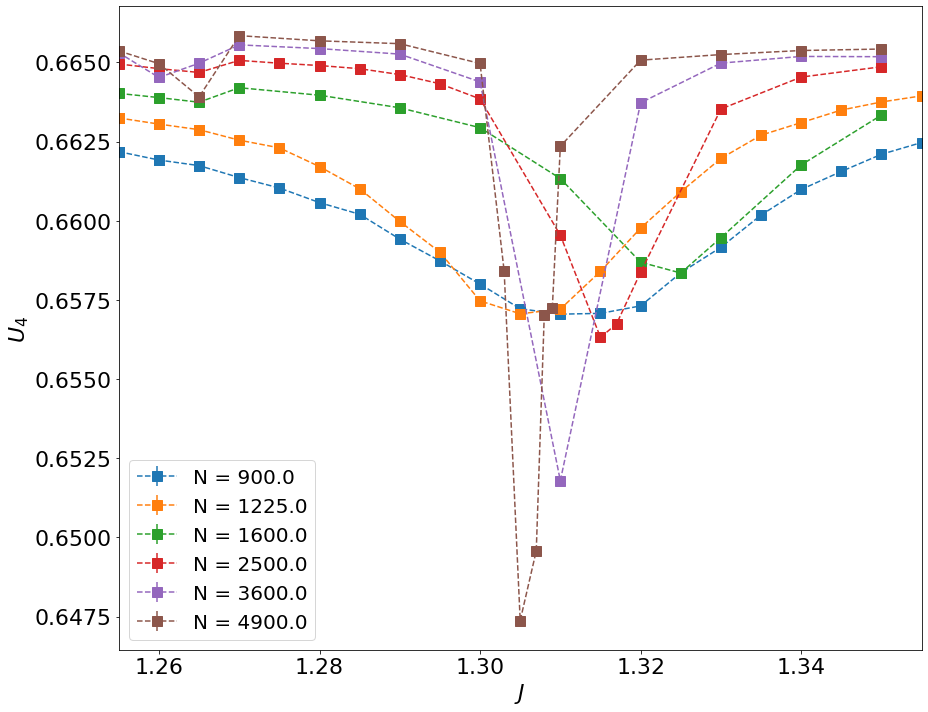

In [9]:
data_np = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np = data_np[data_np[:,1]<1.27] 
data_np = data_np[data_np[:,1]<1.35]
data_np1 = np.loadtxt("CPP/Distributions2/LongChains.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))

data_np1 = np.loadtxt("CPP/LongChains1/LongChains.txt", skiprows=0)
data_np1 = data_np1[data_np1[:,0]<1600] 
data_np = np.vstack((data_np, data_np1))



y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l<900: continue
    #if l==5000: continue
        
    #if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,11]/3/data_l[:,9]/data_l[:,9]
    #print(bc)
  
    errs = (2*data_l[:,10] / data_l[:,9])**2 + (data_l[:,12] /data_l[:,11])
    errs=0*np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(1/3 -0.8, 0.7)
#plt.xlim(1.2, 1.45)
 
plt.xlim(left = 1.255, right=1.355)


plt.legend(loc="best", fontsize=20)
 
 
plt.tight_layout()

plt.savefig("Thesis/Images/bindercumulantsenergy_longchains.png", bbox_inches='tight')